# Machine Learning
For this phase, we'll be exploring different ML techniques that can be used for our gathered data. Some possible techniques we plan on using are Linear Regression and KMC.

## Install Packages

In [1]:
!pip3 install sklearn

Processing /Users/aditya/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074/sklearn-0.0-py2.py3-none-any.whl


## Import Packages

In [114]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts

df = pd.read_csv("rcount.csv")


def pr(p):
    
    return len(p)

df['price_num'] = df['price'].apply(pr)



X_train, X_test, y_train, y_test = tts(df['zip_code_income'],df['restaurant_rating'], test_size = 0.33)

X_train = X_train.to_numpy().reshape(-1,1)
X_test = X_test.to_numpy().reshape(-1,1)
y_train = y_train.to_numpy().reshape(-1,1)

model = LinearRegression()
model.fit(X=X_train, y=y_train)
model.predict(X=X_test)


array([[4.23717072],
       [4.22893125],
       [4.24070971],
       ...,
       [4.23921892],
       [4.21961751],
       [4.23907412]])

In [115]:
df.head()

,id,restaurant_id,restaurant_name,zip_code,avg_sentiment_polarity,avg_sentiment_subjectivity,zip_code_income,restaurant_rating,price,review_count,price_num
0,0,vjGFXOzI1TCLYnnYYjxiXg,Market Restaurant + Bar,92007,0.038889,0.038889,62877.0,4.5,$$$$,910,4
1,1,gxwEOjyhbMYCBSQ7tB7aNw,"Snooze, An A.M. Eatery",92075,0.341270,0.341270,69057.0,4.0,$$,2163,2
2,2,ULJp8Bc_7iLHNz6Xzi2eRw,Thyme In The Ranch,92091,0.484821,0.484821,103904.0,4.0,$$,236,2
3,3,3yQtkLcDAqMVX5oNYHyJhA,Claire's On Cedros,92007,0.311806,0.311806,62877.0,4.0,$$,1378,2
4,4,Sc3Mpf7ei8CS8PW7HD2k6w,Mille Fleurs,92091,0.322159,0.322159,103904.0,4.0,$$$$,330,4


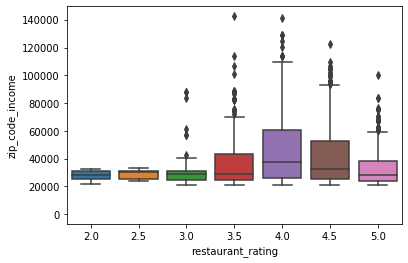

In [116]:
import numpy as np

X_new = pd.DataFrame()
u = df['zip_code_income'].max()
l = df['zip_code_income'].min()
# create a sequence of 200 evenly spaced numbers from 10 to 41
X_new["zip_code_income"] = np.linspace(u, l, num=200)

# create a Series out of the predicted values
# (trailing underscore indicates fitted values)
mo = model.predict(X_new).ravel()
y_new_ = pd.Series(
    mo, # y values in Series.plot.line()
    index=X_new["zip_code_income"]    # x values in Series.plot.line()
)

# plot the data, then the model
# %matplotlib inline
df.plot.scatter(x="zip_code_income", y="restaurant_rating")
# y_new_.plot.box()
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='restaurant_rating', y='zip_code_income', data=df)

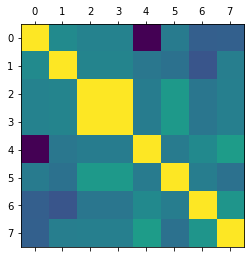

In [117]:

plt.matshow(df.corr())
plt.show()

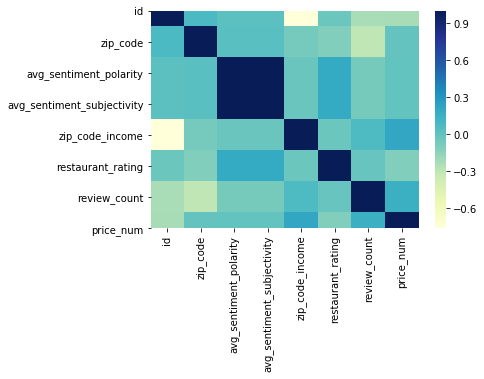

In [118]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,cmap="YlGnBu")


In [129]:
import xgboost as xgb
#sentiment and rating to predict income
dfx = df[['avg_sentiment_subjectivity', 'zip_code_income','price_num','review_count']]
y = df['restaurant_rating']
X_train, X_test, y_train, y_test = tts(dfx,y, test_size = 0.33)
print("hi")
# xgb_model = xgb.XGBRegressor(max_depth=3).fit(X_train, y_train)
# predictions = xgb_model.predict(X_train['zip_code_income'])
# actuals = y_train['restaurant_rating']
# print(confusion_matrix(actuals, predictions))


hi


In [130]:
xgb_model = xgb.XGBClassifier(max_depth=10).fit(X_train, y_train)

In [131]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
predictions = xgb_model.predict(X_test)
actuals = y_test
# print(confusion_matrix(actuals, predictions))

In [132]:
(mean_squared_error(predictions, actuals))

0.13422266139657443

In [133]:
mean_absolute_error(predictions, actuals)

0.1735836627140975

In [134]:
accuracy_score([str(x) for x in actuals],[str(x) for x in predictions])

0.7226613965744401

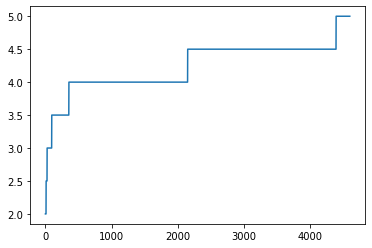

In [135]:
plt.plot(sorted(y))

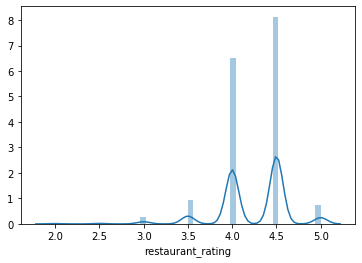

In [136]:
sns.distplot(y)

In [154]:
# fig = plt.figure(figsize=(50, 50))
import matplotlib
xgb.plot_tree(xgb_model, num_trees=4, plot_width='8000', plot_height='3000')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(300, 200)
fig.savefig('/Users/aditya/cs105-prj-phase3-kirbydownb/decision_tree.png')

In [157]:
import pickle
file = open("model.pickle","wb")
pickle.dump(xgb_model,file)